In [94]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

pd.plotting.register_matplotlib_converters()
%matplotlib inline

from sklearn.feature_extraction.text import CountVectorizer
from sklearn import preprocessing, svm
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn. metrics import confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model import LinearRegression 
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import ExtraTreesRegressor


df_ins = pd.read_csv("data.csv")
df_ins.head()


,index,PatientID,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim
0,0,1,39.0,male,23.2,91,Yes,0,No,southeast,1121.87
1,1,2,24.0,male,30.1,87,No,0,No,southeast,1131.51
2,2,3,NaN,male,33.3,82,Yes,0,No,southeast,1135.94
3,3,4,NaN,male,33.7,80,No,0,No,northwest,1136.40
4,4,5,NaN,male,34.1,100,No,0,No,northwest,1137.01


In [95]:
df_ins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          1340 non-null   int64  
 1   PatientID      1340 non-null   int64  
 2   age            1335 non-null   float64
 3   gender         1340 non-null   object 
 4   bmi            1340 non-null   float64
 5   bloodpressure  1340 non-null   int64  
 6   diabetic       1340 non-null   object 
 7   children       1340 non-null   int64  
 8   smoker         1340 non-null   object 
 9   region         1337 non-null   object 
 10  claim          1340 non-null   float64
dtypes: float64(3), int64(4), object(4)
memory usage: 115.3+ KB


In [96]:
df_ins['age'] = df_ins['age'].fillna(df_ins['age'].mean())

In [97]:
df_ins['region'] = df_ins['region'].fillna(df_ins['region'].mode()[0])

C:\Users\User\AppData\Local\Temp\ipykernel_4988\2240328352.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df_ins.corr()


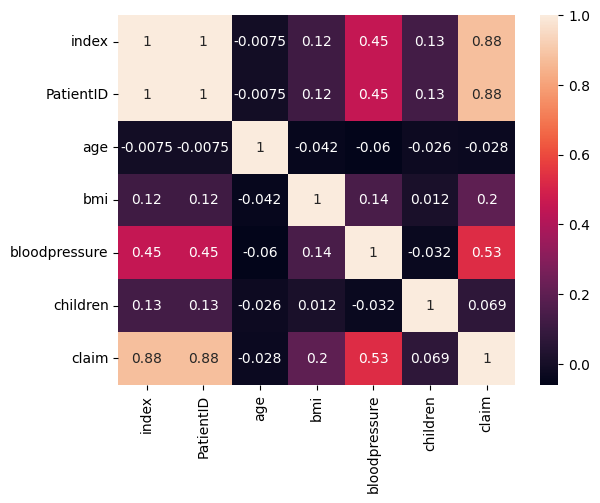

In [98]:
corr = df_ins.corr()
sns.heatmap(corr, annot=True)
plt.show()

In [99]:
df_ins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          1340 non-null   int64  
 1   PatientID      1340 non-null   int64  
 2   age            1340 non-null   float64
 3   gender         1340 non-null   object 
 4   bmi            1340 non-null   float64
 5   bloodpressure  1340 non-null   int64  
 6   diabetic       1340 non-null   object 
 7   children       1340 non-null   int64  
 8   smoker         1340 non-null   object 
 9   region         1340 non-null   object 
 10  claim          1340 non-null   float64
dtypes: float64(3), int64(4), object(4)
memory usage: 115.3+ KB


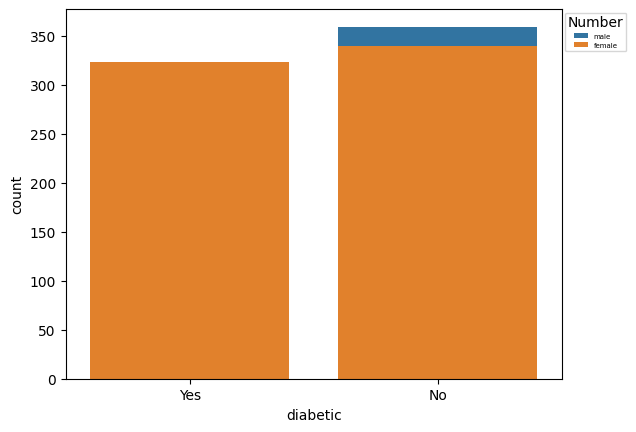

In [100]:
sns.countplot(x="diabetic", hue="gender", data=df_ins, dodge=False)
plt.legend(title = 'Number', bbox_to_anchor = (1, 1), fontsize=5)

<AxesSubplot: xlabel='diabetic', ylabel='age'>

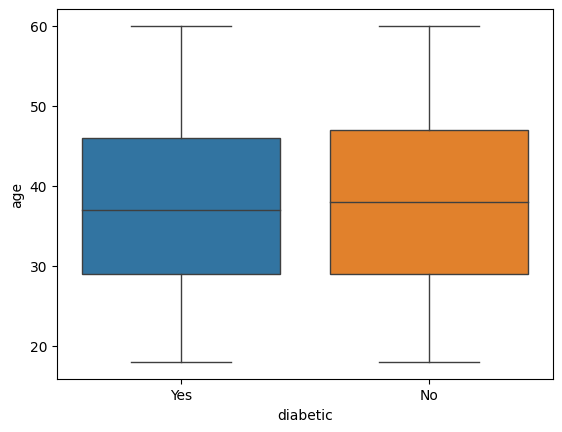

In [101]:
sns.boxplot(x="diabetic", y="age", data=df_ins, linewidth = 1, fliersize = 1)

In [102]:
cat_df = df_ins[['gender', 'diabetic', 'children', 'smoker', 'region']]
num_df = df_ins[['age', 'bmi', 'bloodpressure', 'claim']]
## label encoding 
le = LabelEncoder ()

#select ctegorical columns 
cat_df = df_ins.select_dtypes(exclude=["int", "float"])

for i in cat_df:
    cat_df[i] = le.fit_transform(df_ins[i])

#joining the data to the numeric data
num_df = df_ins.select_dtypes(include=['int', 'float'])
main_df = pd.concat([num_df, cat_df], axis=1)

In [103]:
# Segregating the Dependent Variables in X and Independent Variable in Y
X = main_df.drop(columns=["claim"])
y = main_df["claim"]

## standardize the price data values to avoid biased outcome of predictions
scaler = StandardScaler()
x_scaled=scaler.fit_transform(X)

In [104]:
#scaler = preprocessing.MinMaxScaler()
names = main_df.columns
d = scaler.fit_transform(main_df)
scaled_dataset = pd.DataFrame(d, columns=names)
#Split
X = main_df.drop('diabetic', axis=1);
y = main_df['diabetic'];
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=77777)

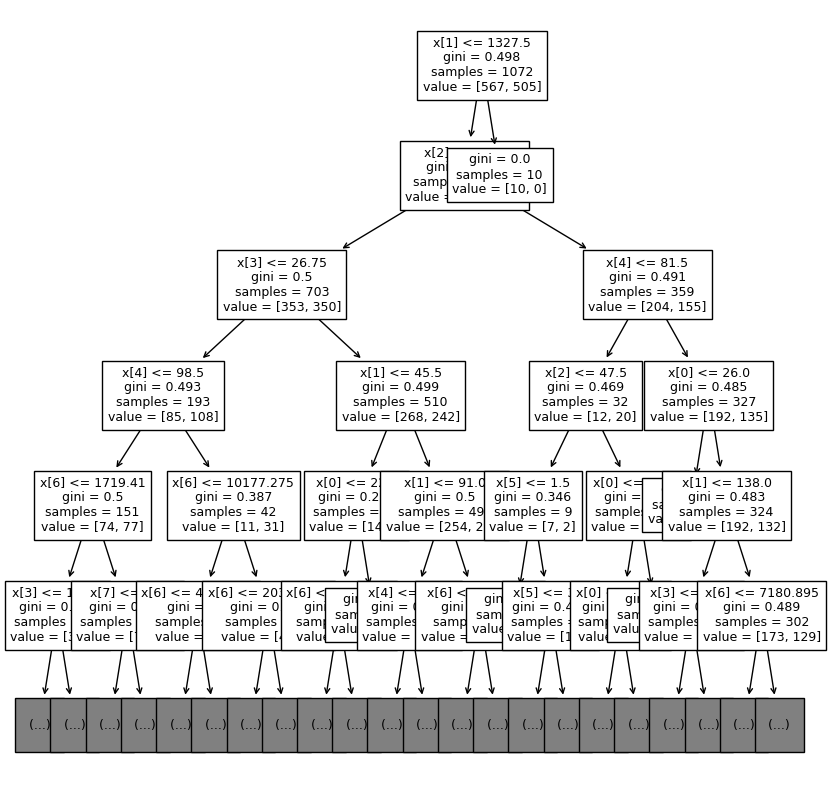

In [105]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
prediction = decision_tree.predict(X_test)
plt.figure(figsize=(10,10))
plot_tree(decision_tree, max_depth=5, fontsize=9)
plt.show()

In [106]:
adaboost = AdaBoostClassifier()
adaboost.fit(X_train, y_train)
prediction = adaboost.predict(X_test)
print(classification_report(y_test,prediction))
print(confusion_matrix(y_test, prediction))

              precision    recall  f1-score   support

           0       0.46      0.56      0.50       131
           1       0.46      0.36      0.41       137

    accuracy                           0.46       268
   macro avg       0.46      0.46      0.45       268
weighted avg       0.46      0.46      0.45       268

[[73 58]
 [87 50]]


In [107]:
svm = svm.SVC()
svm.fit(X_train, y_train)
prediction = svm.predict(X_test)
print(classification_report(y_test,prediction))
print(confusion_matrix(y_test, prediction))

              precision    recall  f1-score   support

           0       0.49      1.00      0.66       131
           1       0.00      0.00      0.00       137

    accuracy                           0.49       268
   macro avg       0.24      0.50      0.33       268
weighted avg       0.24      0.49      0.32       268

[[131   0]
 [137   0]]


c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

In [76]:
randomForest = RandomForestClassifier()
randomForest.fit(X_train, y_train)
prediction = randomForest.predict(X_test)
print(classification_report(y_test,prediction))
print(confusion_matrix(y_test, prediction))

              precision    recall  f1-score   support

           0       0.72      0.61      0.66       142
           1       0.62      0.73      0.67       126

    accuracy                           0.66       268
   macro avg       0.67      0.67      0.66       268
weighted avg       0.67      0.66      0.66       268

[[86 56]
 [34 92]]
